# Resolução da folha de exercícios n.° 2 da matéria PTC-3569, "Introdução à Inteligência Computacional", ministrada pelo Prof. Dr. Ademar Ferreira
Aluna: Renata Leite Leandro, N.° USP: 11246993

# Introdução
Usaremos os seguintes pacotes para a resolução do exercício:

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Precisaremos, também, da leitura dos seguintes arquivos:

In [42]:
tabela_1 = pd.read_csv('ex2.csv')    # Leitura da tabela do exercício 2  
tabela_2 = pd.read_csv('ex3.csv')    # Leitura da tabela do exercício 3 

E, para uma boa visualização dos gráficos que serão plotados, usamos os seguintes comandos:

In [43]:
# Adiciona linhas no background dos gráficos, facilitando a visualização
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="whitegrid", rc=custom_params)

# Exercício 1
##### Enunciado: "Pode-se aplicar o algoritmo LMS para os dados das tabelas abaixo. Para isso, faça um programa de computador em C, C++, Matlab ou Python, considerando o caso geral de dimensão D do vetor de entrada e N amostras de treinamento. Inclua o viés (bias) b como um dos coeficientes (ou pesos) da regressão linear. Faça previsão para plotar curvas de aprendizagem (J vs k) e de evolução do valor dos pesos (w vs k). Considere dois casos: a) Modo batelada e b) Modo amostra por amostra"

### Resolução:

Utilizaremos a linguagem Python para criar duas funções distintas, sendo uma considerando o modo batelada e, a outra, o modo amostra por amostra. 

Observação: Não será necessário o redimensionamento (scaling) dos dados, visto que os valores dos exercícios não são destoantes!

In [44]:
def modo_batelada (tabela, x, d_verdadeiro, epochs, learning_rate=0.1):
    """ Função que aplica o algoritmo LMS (em modo 'batelada') para uma tabela com conjunto(s) x e um conjunto d de pontos.
    Entrada: tabela = um arquivo .csv lido que contenha os valores de x e d; x = as coluna(s) com os valores x; d_verdadeiro 
    = a coluna com os valores d; epochs = quantas vezes o algoritmo passará por todas as amostras do dataset; learning_rate 
    = um coeficiente de aprendizagem (controla sua velocidade) com valor fixo. 
    Saída: uma lista com os valores do custo J calculado por MSE; uma lista com a quantidade k de epochs passadas; uma lista
    com cada atualização do(s) valor(es) do(s) peso(s); uma lista com cada atualização do valor do bias                  """
    
    numero_de_features = len(tabela.columns) - 1    # Conta o número de features na tabela subtraíndo a saída 'd'
    total_amostras = len(tabela.index)    # Conta o número de amostras em uma coluna da tabela

    # Começaremos com a hipótese do(s) peso(s) e do bias serem iguais a 1
    if numero_de_features == 1:
        w = 1
    else:
        w = np.ones(shape=(numero_de_features))
    b = 1
    
    # Criamos algumas listas vazias para armazenar os valores atualizados dos pesos, do viés e do custo, e também para contar o número de epochs decorridas.
    lista_J = []
    lista_k = []
    lista_w = []
    lista_b = []

    # Calcula o(s) novo(s) valore(s) do(s) peso(s)
    while epochs != 0:
        d_predito = np.dot(w, x.T) + b    # Ou seja, w1*feature1 + w2*feature2 + bias
        w_grad = -(2/(numero_de_features*total_amostras)) * (x.T.dot(d_verdadeiro - d_predito))
        w = w - learning_rate * w_grad
        lista_w.append(w)
       
        # Calcula o novo valor do viés
        b_grad = -(2/(numero_de_features*total_amostras)) * np.sum(d_verdadeiro - d_predito)
        b = b - learning_rate * b_grad
        lista_b.append(b)
        
        # Calcula o novo valor do custo
        J = (np.mean(np.square(d_verdadeiro - d_predito)))/2    # Mean Square Error (MSE), critério que julgará a qualidade da regressão linear
        lista_J.append(J)
        
        lista_k.insert(0, epochs)
        epochs = epochs - 1    # Passa para uma nova epoch
        
    return lista_J, lista_k, lista_w, lista_b

A função acima representa o modo batelada ou aprendizado por batch, em que há a modificação dos pesos e do bias apenas após o fim de uma epoch. Isso significa que precisamos passar por todos os samples do dataset para calcular o erro cumulativo e, apenas então, modificar os valores de w e b por backpropagation. Nesse caso, obteremos o gradiente verdadeiro a partir de uma solução analítica (matemática), e, portanto, teremos uma curva de aprendizagem "limpa". Em breve, veremos melhor essa curva.

In [45]:
def modo_amostra (tabela, x, d_verdadeiro, epochs, learning_rate=0.001):
    """ Função que aplica o algoritmo LMS (modo 'amostra por amostra') para tabela com conjunto(s) x e conjunto d de pontos.
    Entrada: tabela = um arquivo .csv lido que contenha os valores de x e d; x = as coluna(s) com os valores x; d_verdadeiro 
    = a coluna com os valores d; epochs = quantas vezes o algoritmo passará por todas as amostras do dataset; learning_rate 
    = um coeficiente de aprendizagem (controla sua velocidade) com valor fixo. 
    Saída: uma lista com os valores do custo J calculado por MSE; uma lista com a quantidade k de iterações; uma lista com
    cada atualização do(s) valor(es) do(s) peso(s); uma lista com cada atualização do valor do bias.                    """
    
    numero_de_features = len(tabela.columns) - 1    # Conta o número de features na tabela subtraíndo a saída 'd'
    total_amostras = len(tabela.index)    # Conta o número de amostras em uma coluna da tabela

    # Começaremos com a hipótese do(s) peso(s) e do bias serem iguais a 1
    if numero_de_features == 1:
        w = 1
    else:
        w = np.ones(shape=(numero_de_features))
    b = 1
    
    # Criamos algumas listas vazias para armazenar os valores atualizados dos pesos, do viés e do custo, e também para contar o número de epochs decorridas.
    lista_J = []
    lista_k = []
    lista_w = []
    lista_b = []

    # Calcula o(s) novo(s) valore(s) do(s) peso(s)
    cont = 0
    while epochs != 0:
        n = 0
        while n < total_amostras:
            d_predito = (w * x[n]) + b    # Ou seja, w1*feature1 +  bias
            w_grad = x[n] * (d_verdadeiro[n] - d_predito)    # Gradiente instantâneo = produto da entrada * erro
            w = w + learning_rate * w_grad    # Atualização do peso pela fórmula w(k+1) = w(k) + eta * erro(k) * x(k)
            lista_w.append(w)
            
            # Calcula o novo valor do custo
            J = (np.mean(np.square(d_verdadeiro - d_predito)))/2    # Mean Square Error (MSE), critério que julgará a qualidade da regressão linear
            lista_J.append(J)
            
            # Calcula o novo valor do viés
            b_grad = -(2/(numero_de_features*total_amostras)) * sum(d_verdadeiro - d_predito)
            b = b - learning_rate * b_grad
            lista_b.append(b)
                        
            cont = cont + 1
            lista_k.append(cont)
            n = n + 1
            
        epochs = epochs - 1    # Passa para uma nova epoch
        
    return lista_J, lista_k, lista_w, lista_b

Já esta última função representa o modo amostra por amostra ou aprendizado online, em que há a modificação dos pesos e do bias a cada sample. Isso significa que, ao contrário do modo batelada, não precisamos esperar o final de uma epoch para alterar os valores de w e b. Apesar do elevado número de atualizações dos pesos, tal método exigirá, na verdade, um menor poder computacional que o modo batelada, pois, com a substituição do gradiente verdadeiro pelo gradiente instantâneo, os cálculos matemáticos de busca do gradiente são simplificados e facilitados. Há, porém, um contraponto: com o uso de gradiente instantâneo, haverá barulho, por exemplo, na curva de aprendizagem, que ziguezagueará até seu valor mínimo.

# Exercício 2
##### Enunciado: "Aplique o programa acima para o caso: a)  x = [-0.4, -0.2, -0.1, 0.3, 0.6, 0.5, 0.7], d = [-1, 1.5, 2, 3.2, 3.5, 5,2].     /     b)  Calcule o coeficiente de correlação.     /     c)  Estime o valor de d para x = 0 e x = 1. Em qual d você tem mais confiança? Justifique."

### Resolução: a)

Vamos aplicar os programas criados anteriormente para plotar diferentes curvas considerando os modos batelada e amostra por amostra:

In [46]:
# Selecionando os dados da 'tabela_1'
tabela = tabela_1
x = tabela_1['x']
d_verdadeiro = tabela_1['d']
epochs = 150
    
# Aplicação do programa (modo batelada)
lista_Jb, lista_kb, lista_wb, lista_bb = modo_batelada(tabela, x, d_verdadeiro, epochs, learning_rate=0.1)

# Aplicação do programa (modo amostra)
lista_Ja, lista_ka, lista_wa, lista_ba = modo_amostra(tabela, x, d_verdadeiro, epochs, learning_rate=0.001)

Agora, plotaremos os gráficos de curva de aprendizagem:

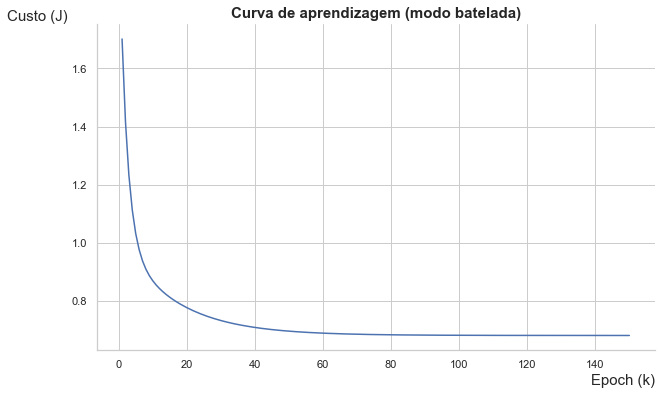

In [47]:
plt.figure(figsize = (10, 6))
plt.title('Curva de aprendizagem (modo batelada)', fontsize=15, weight='bold')
plt.xlabel('Epoch (k)', fontsize=15, loc='right')
plt.ylabel('Custo (J)', rotation=0, fontsize=15, loc='top')
plt.plot(lista_kb, lista_Jb, linewidth=1.5)

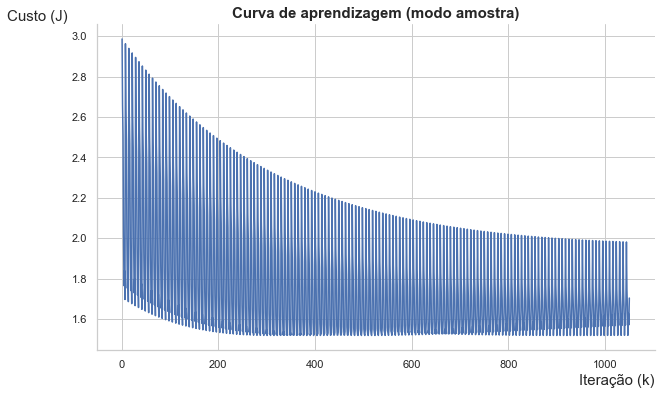

In [48]:
plt.figure(figsize = (10, 6))
plt.title('Curva de aprendizagem (modo amostra)', fontsize=15, weight='bold')
plt.xlabel('Iteração (k)', fontsize=15, loc='right')
plt.ylabel('Custo (J)', rotation=0, fontsize=15, loc='top')
plt.plot(lista_ka, lista_Ja, linewidth=1.5)

A curva de aprendizagem (J vs k) é o melhor modo de monitorar se o(s) peso(s) e o bias estão atingindo seus valores ideais, e a aproximação de J de seu mínimo indica uma melhora na convergência do processo de adaptação. Comparando as duas curvas de aprendizagem plotadas, vemos uma importante questão mencionada anteriormente: se, por um lado, o modo batelada tem como resultado uma curva "lisa" e "limpa", por outro, o modo amostra por amostra apresenta uma curva que ziguezagueia até o seu valor mínimo, consequência da substituição do gradiente verdadeiro pelo gradiente instantâneo. Ressalta-se que o Jmin obtido pelo modo amostra por amostra encontra-se, provavelmente, equivocado nesta resolução, já que os resultados finais (Jmin) dos dois modos, deveriam ser, em geral, bastante próximos, o que indicaria que ambos são eficazes na resolução do problema. No nosso caso, enquanto o Jmin do modo batelada estabilizou próximo ao valor 0.7 (satisfarório), o Jmin do modo amostra por amostra ficou próximo a 1.7, indicando algum tipo de falha em seu código.

Em seguida, podemos plotar também os gráficos com a evolução dos valores do peso:

O valor ótimo do peso encontrado após 150 epochs é: 3.2134497786690686


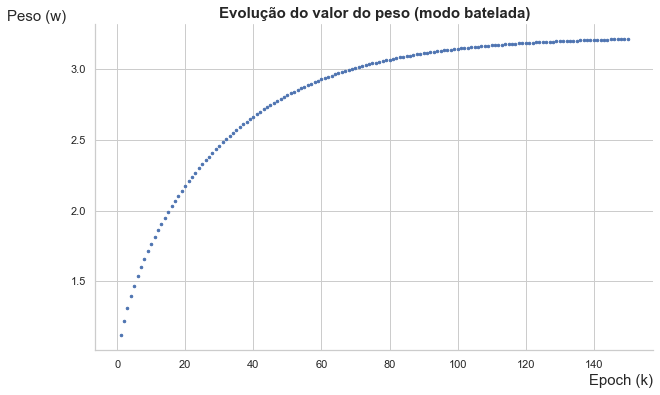

In [49]:
plt.figure(figsize = (10, 6))
plt.title('Evolução do valor do peso (modo batelada)', fontsize=15, weight='bold')
plt.xlabel('Epoch (k)', fontsize=15, loc='right')
plt.ylabel('Peso (w)', rotation=0, fontsize=15, loc='top')
plt.plot(lista_kb, lista_wb, linewidth=0, marker='o', markersize=2.5)

print('O valor ótimo do peso encontrado após 150 epochs é:', lista_wb[-1])

O valor ótimo do peso encontrado após 1000 iterações é: 1.4267707760141028


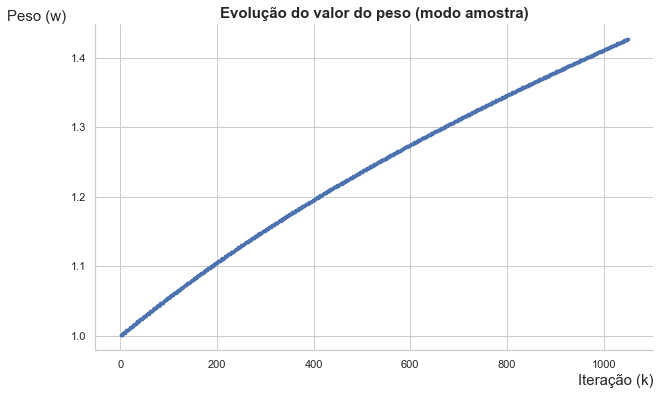

In [50]:
plt.figure(figsize = (10, 6))
plt.title('Evolução do valor do peso (modo amostra)', fontsize=15, weight='bold')
plt.xlabel('Iteração (k)', fontsize=15, loc='right')
plt.ylabel('Peso (w)', rotation=0, fontsize=15, loc='top')
plt.plot(lista_ka, lista_wa, linewidth=0, marker='o', markersize=2.5)

print('O valor ótimo do peso encontrado após 1000 iterações é:', lista_wa[-1])

Nesses casos, é interessante ver como a evolução do peso começa a estabilizar no final do primeiro gráfico, indicando que ele encontra-se próximo de seu valor ideal. Já no segundo gráfico, muito provavelmente algum problema na resolução deste exercício fez com que o peso não estabilizasse e nem chegasse ao seu valor ideal (isto é, próximo a 3.2, conforme verificado pelo modo batelada).

Por último, veremos os gráficos com a evolução do valor do bias:

O valor ótimo do bias encontrado após 150 epochs é: 1.6722699800856944


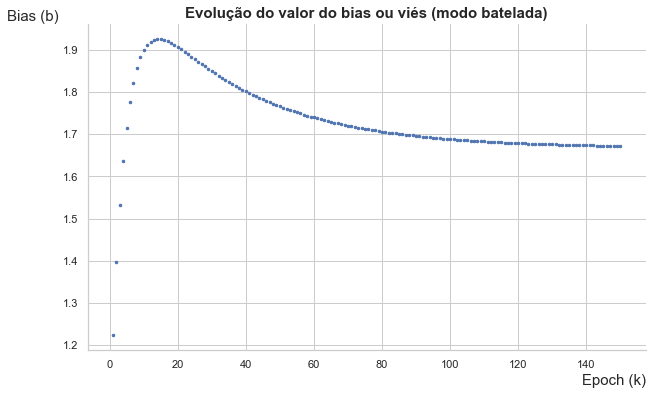

In [51]:
plt.figure(figsize = (10, 6))
plt.title('Evolução do valor do bias ou viés (modo batelada)', fontsize=15, weight='bold')
plt.xlabel('Epoch (k)', fontsize=15, loc='right')
plt.ylabel('Bias (b)', rotation=0, fontsize=15, loc='top')
plt.plot(lista_kb, lista_bb, linewidth=0, marker='o', markersize=2.5)

print('O valor ótimo do bias encontrado após 150 epochs é:', lista_bb[-1])

O valor ótimo do bias encontrado após 1000 iterações é: 1.922972557126233


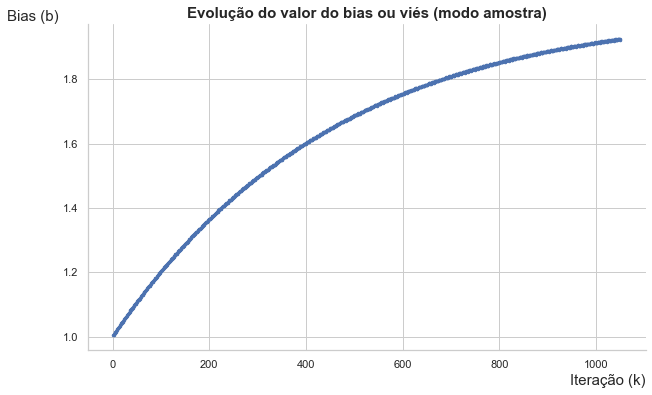

In [52]:
plt.figure(figsize = (10, 6))
plt.title('Evolução do valor do bias ou viés (modo amostra)', fontsize=15, weight='bold')
plt.xlabel('Iteração (k)', fontsize=15, loc='right')
plt.ylabel('Bias (b)', rotation=0, fontsize=15, loc='top')
plt.plot(lista_ka, lista_ba, linewidth=0, marker='o', markersize=2.5)

print('O valor ótimo do bias encontrado após 1000 iterações é:', lista_ba[-1])

Assim como o o peso, a evolução do bias começa a estabilizar no final da curva no primeiro gráfico, indicando que ele encontra-se próximo de seu valor ideal (1.67). Já no segundo gráfico, referente ao modo amostra por amostra, o bias encontra-se relativamente estável e, portanto, podemos considerar seu valor (1.92) como satisfatório.

### Resolução: b)

O coeficiente de correlação (r) é utilizado para medir o quão forte é a relação entre duas variáveis, apresentando valores entre [-1 e 1], sendo r = -1: correlação perfeitamente negativa, r = +1: correlação perfeitamente positiva e r = 0: sem correlação. Podemos calculá-lo da seguinte forma:

In [53]:
# Selecionando os valores de x e d da 'tabela_1'
x = tabela_1['x']
d = tabela_1['d']

# Calculando o coeficiente de correlação de Pearson
r = np.corrcoef(x, d)
print('O coeficiente de correlação para o caso descrito é igual a: \n', r)

O coeficiente de correlação para o caso descrito é igual a: 
 [[1.        0.7420526]
 [0.7420526 1.       ]]


A partir deste valor, podemos compreender o quanto a variação do outcome d pode ser explicada pela regressão linear feita a partir da variável independente x. Considerando que o resultado obtido pelo cálculo foi de aproximadamente r = 0.74, temos que o encaixe do modelo linear aos dados é relativamente satisfatório, estando mais próximo à correlação perfeitamente positiva.

### Resolução: c)

Considerando podemos prever d pela multiplicação dos pesos com as features e soma do bias (ou seja, w1 * feature1 + w2 * feature2 (...) + wn * featuren + bias), temos que:

- Para x = 0: d = 3.22 * 0 + 1.66  ->  d = 1.66

- Para x = 1: d = 3.22 * 1 + 1.66  ->  d = 4.88

Adicionando os novos valores, teríamos a seguinte tabela:

In [54]:
# Cria um dataframe com os valores preditos
predicao = {'x': [0, 1], 'd': [1.66, 4.88]}
df = pd.DataFrame(predicao)

# Com a função concat, une os valores preditos à tabela_1, criando uma nova tabela
nova_tabela_1 = pd.concat([tabela_1, df], ignore_index=True)

# Mostra a tabela criada
nova_tabela_1

,x,d
0,-0.4,-1.00
1,-0.2,1.50
2,-0.1,2.00
3,0.3,3.20
4,0.6,3.50
5,0.5,5.00
6,0.7,2.00
7,0.0,1.66
8,1.0,4.88


Por fim, para verificarmos qual estimativa transmite maior confiança, podemos calcular a mudança do coeficiente de correlação para cada caso, quando x = 0 e x = 1. Assim, quanto maior o coeficiente de correlação, maior será a confiança na estimativa. Observe:

In [55]:
# Cria dois dataframes cópias da nova_tabela_1, mas sem os valores das predições x=0 e x=1, respectivamente
sem_x0 = nova_tabela_1.drop(index=7)
sem_x1 = nova_tabela_1.drop(index=8)

# Selecionando os valores de x e d dos dois novos dataframes
x0 = sem_x0['x']
d0 = sem_x0['d']
x1 = sem_x1['x']
d1 = sem_x1['d']

# Calculando o coeficiente de correlação de Pearson para verificar em qual estimativa de d há maior confiança
r2 = np.corrcoef(x0, d0)
print('Quando adicionamos a estimativa do valor de d para x = 1 à tabela original, o coeficiente de correlação muda para: \n', r2)
r1 = np.corrcoef(x1, d1)
print('\n' 'Quando adicionamos a estimativa do valor de d para x = 0 à tabela original, o coeficiente de correlação muda para: \n', r1)

Quando adicionamos a estimativa do valor de d para x = 1 à tabela original, o coeficiente de correlação muda para: 
 [[1.         0.80403134]
 [0.80403134 1.        ]]

Quando adicionamos a estimativa do valor de d para x = 0 à tabela original, o coeficiente de correlação muda para: 
 [[1.         0.74727765]
 [0.74727765 1.        ]]


Portanto,

- Para x = 0, d = 1.66 e o coeficiente de correlação (ou seja, a relação entre as variáveis da nova tabela_1) passa a ser r = 0.75
- Para x = 1, d = 4.88 e o coeficiente de correlação (ou seja, a relação entre as variáveis da nova tabela_1) passa a ser r = 0.80

Concluímos, então, que a o valor estimado de d para x = 1 é o mais confiável.

# Exercício 3
##### Enunciado: "Para x1 = [-0.5, -0.2,-0.1,0.3,0.4,0.6,0.7], x2 = [3,3,2.5,2.5,-1,-1.5,-4] e d = [-3,-1,0,1.2,1.8,3,4], calcule a regressão linear aplicando o programa desenvolvido"

### Resolução:

Com o algoritmo que calcula a regressão linear já desenvolvido no exercício 1, bata-nos aplicá-lo aos dados da nova tabela fornecida.

In [56]:
# Selecionando os dados da 'tabela_2'
tabela = tabela_2
x = tabela_2.drop('d', axis='columns')
d_verdadeiro = tabela_2['d']
epochs = 400    # Utilizamos um maior número de epochs porque o learning_rate será diminuído para que as curvas de peso e bias estabilizem

# Aplicação do programa (modo batelada)
lista_Jb, lista_kb, lista_wb, lista_bb = modo_batelada(tabela, x, d_verdadeiro, epochs, learning_rate=0.001)

Agora, utilizaremos suas estimativas de custo para apresentar a curva de aprendizagem:

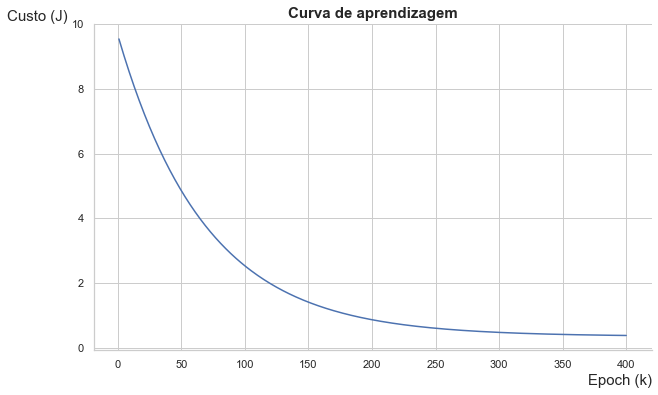

In [57]:
plt.figure(figsize = (10, 6))
plt.title('Curva de aprendizagem', fontsize=15, weight='bold')
plt.xlabel('Epoch (k)', fontsize=15, loc='right')
plt.ylabel('Custo (J)', rotation=0, fontsize=15, loc='top')
plt.plot(lista_kb, lista_Jb, linewidth=1.5)

Vemos que a evolução do valor do custo é bastante satisfatória, já que fomos capazes de chegar a um valor próximo de 0.5 no final da curva do gráfico de aprendizagem, em que há a estabilização de J.

Em seguida, podemos encontrar os valores dos pesos:

O valor ótimo do peso 1 encontrado após 150 epochs é: 1.2465270683563214
O valor ótimo do peso 2 encontrado após 150 epochs é: -0.48297456561040697


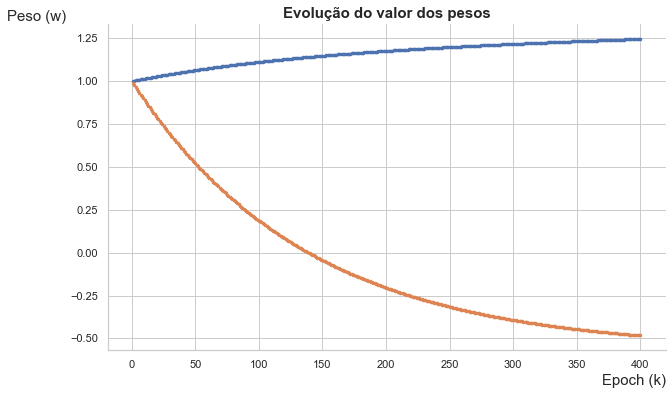

In [58]:
plt.figure(figsize = (10, 6))
plt.title('Evolução do valor dos pesos', fontsize=15, weight='bold')
plt.xlabel('Epoch (k)', fontsize=15, loc='right')
plt.ylabel('Peso (w)', rotation=0, fontsize=15, loc='top')
plt.plot(lista_kb, lista_wb, linewidth=0, marker='o', markersize=2.5)

print('O valor ótimo do peso 1 encontrado após 150 epochs é:', lista_wb[-1][0])
print('O valor ótimo do peso 2 encontrado após 150 epochs é:', lista_wb[-1][1])

Visto que temos duas variáveis, temos, também, dois pesos. Suas estimativas mostram que w1 = 1.24 e w2 = -0.48, visto que é por volta desses valores que os pesos começam a estabilizar.

Agora, vamos para o bias:

O valor ótimo do bias encontrado após 150 epochs é: 0.9083405815830525


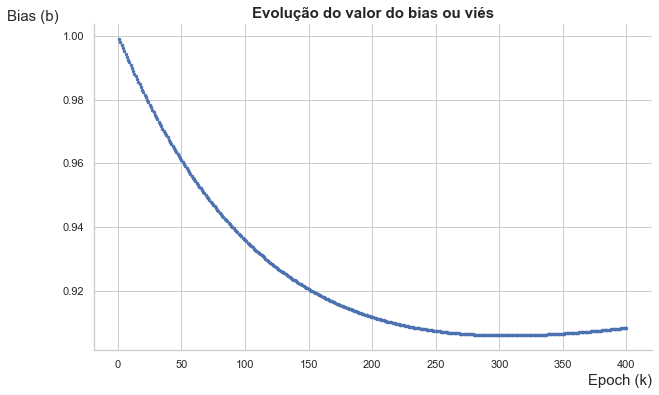

In [59]:
plt.figure(figsize = (10, 6))
plt.title('Evolução do valor do bias ou viés', fontsize=15, weight='bold')
plt.xlabel('Epoch (k)', fontsize=15, loc='right')
plt.ylabel('Bias (b)', rotation=0, fontsize=15, loc='top')
plt.plot(lista_kb, lista_bb, linewidth=0, marker='o', markersize=2.5)

print('O valor ótimo do bias encontrado após 150 epochs é:', lista_bb[-1])

Vemos que é por volta de 0.90 que b passa a variar menos. Portanto, este será o valor que podemos considerar como ideal.